In [104]:
import pandas as pd
import numpy as np
import json
from tqdm.notebook import tqdm_notebook
import tmdbsimple as tmdb
import matplotlib.pyplot as plt

from scipy import stats
import scipy
scipy.__version__


'1.8.1'

In [9]:
import seaborn as sns
import plotly.express as px

# Title Basics DF

In [10]:
basics_url='https://datasets.imdbws.com/title.basics.tsv.gz'
basics_df = pd.read_csv(basics_url,sep='\t', low_memory=False)

In [11]:
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


## Replace "\N" with nan
- keep only title type 'Movie'

In [12]:
basics_df = basics_df.replace({'\\N':np.nan})
basics_df['endYear'].value_counts()

2017    5894
2018    5830
2019    5715
2020    5250
2016    4634
        ... 
1906       1
2028       1
1944       1
1925       1
1935       1
Name: endYear, Length: 97, dtype: int64

In [13]:
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"


In [14]:
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9211717 entries, 0 to 9211716
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 632.5+ MB


In [15]:
basics_df.duplicated().sum()

0

In [16]:
basics_df.isna().sum()

tconst                  0
titleType               0
primaryTitle           11
originalTitle          11
isAdult                 1
startYear         1227268
endYear           9115846
runtimeMinutes    6741582
genres             427035
dtype: int64

In [17]:
movie_filter= basics_df['titleType']=='movie'
movie_filter

0          False
1          False
2          False
3          False
4          False
           ...  
9211712    False
9211713    False
9211714    False
9211715    False
9211716    False
Name: titleType, Length: 9211717, dtype: bool

In [18]:
basics_df[movie_filter]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,NaN,45,Romance
498,tt0000502,movie,Bohemios,Bohemios,0,1905,NaN,100,NaN
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,NaN,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,NaN,90,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,NaN,NaN,Drama
...,...,...,...,...,...,...,...,...,...
9211607,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,NaN,57,Documentary
9211634,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,NaN,100,Documentary
9211646,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,NaN,NaN,Comedy
9211657,tt9916730,movie,6 Gunn,6 Gunn,0,2017,NaN,116,NaN


In [19]:
basics_movie_df= basics_df[basics_df['titleType']=='movie']
basics_movie_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,NaN,45,Romance
498,tt0000502,movie,Bohemios,Bohemios,0,1905,NaN,100,NaN
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,NaN,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,NaN,90,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,NaN,NaN,Drama


## Eliminate movies that are null for runtime Minutes, genres, and movies that include 'Documentary' Type. 



In [20]:
basics_movie_df = basics_movie_df.dropna(subset=['runtimeMinutes', 'genres'])

In [21]:
basics_movie_df.isna().sum()

tconst                 0
titleType              0
primaryTitle           0
originalTitle          0
isAdult                0
startYear           5869
endYear           367716
runtimeMinutes         0
genres                 0
dtype: int64

In [22]:
is_documentary = basics_movie_df['genres'].str.contains('documentary',case=False)
basics_movie_df = basics_movie_df[~is_documentary]

In [23]:
basics_movie_df['genres'].value_counts()

Drama                         68040
Comedy                        28928
Comedy,Drama                  10416
Drama,Romance                  9794
Horror                         7374
                              ...  
Crime,Film-Noir,Sport             1
Adventure,Comedy,Game-Show        1
History,Mystery,Sci-Fi            1
Action,Fantasy,War                1
Crime,Fantasy,Sci-Fi              1
Name: genres, Length: 1158, dtype: int64

In [24]:
basics_movie_df['titleType'].value_counts()

movie    280075
Name: titleType, dtype: int64

##keep start year 2000-2022

In [25]:
basics_movie_df['startYear'].value_counts()

2018    9581
2017    9402
2019    9315
2016    8997
2015    8545
        ... 
1906       1
1903       1
1908       1
2027       1
1894       1
Name: startYear, Length: 124, dtype: int64

In [26]:
basics_movie_df = basics_movie_df.dropna(subset=['startYear'])

In [27]:
basics_movie_df['startYear'] = basics_movie_df['startYear'].astype(int)
print (basics_movie_df.dtypes)

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear          int64
endYear           object
runtimeMinutes    object
genres            object
dtype: object


In [28]:
basics_movie_df.loc[basics_movie_df['startYear']>=2000]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34792,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
61093,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
67639,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
77933,tt0079644,movie,November 1828,November 1828,0,2001,NaN,140,"Drama,War"
86770,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
...,...,...,...,...,...,...,...,...,...
9211389,tt9916170,movie,The Rehearsal,O Ensaio,0,2019,NaN,51,Drama
9211398,tt9916190,movie,Safeguard,Safeguard,0,2020,NaN,95,"Action,Adventure,Thriller"
9211437,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,NaN,84,Thriller
9211482,tt9916362,movie,Coven,Akelarre,0,2020,NaN,92,"Drama,History"


In [29]:
basics_movie_df = basics_movie_df.loc[basics_movie_df['startYear']>=2000]
basics_movie_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34792,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
61093,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
67639,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
77933,tt0079644,movie,November 1828,November 1828,0,2001,NaN,140,"Drama,War"
86770,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"


In [30]:
basics_movie_df['startYear'].min()

2000

In [31]:
basics_movie_df['startYear'].max()

2027

In [32]:
basics_movie_df = basics_movie_df.loc[basics_movie_df['startYear']>=2000]
basics_movie_df = basics_movie_df.loc[basics_movie_df['startYear']<=2022]



In [33]:
basics_movie_df.max()

tconst                            tt9916538
titleType                             movie
primaryTitle      è solo questione di tempo
originalTitle     è solo questione di tempo
isAdult                                   1
startYear                              2022
endYear                                None
runtimeMinutes                          999
genres                              Western
dtype: object

In [34]:
basics_movie_df.min()

tconst                   tt0035423
titleType                    movie
primaryTitle      #1 Serial Killer
originalTitle     #1 Serial Killer
isAdult                          0
startYear                     2000
endYear                       None
runtimeMinutes                   1
genres                      Action
dtype: object

In [35]:
basics_movie_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34792,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
61093,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
67639,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
77933,tt0079644,movie,November 1828,November 1828,0,2001,NaN,140,"Drama,War"
86770,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"


In [36]:
basics_movie_df['runtimeMinutes'] = basics_movie_df['runtimeMinutes'].astype(int)
print (basics_movie_df.dtypes)

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear          int64
endYear           object
runtimeMinutes     int64
genres            object
dtype: object


# Title AKA Dataframe

In [37]:
aka_url='https://datasets.imdbws.com/title.akas.tsv.gz'
aka_df = pd.read_csv(aka_url,sep='\t', low_memory=False)
aka_df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [38]:
aka_df.shape

(33132167, 8)

In [39]:
aka_df = aka_df.replace({'\\N':np.nan})

In [40]:
aka_df.duplicated().sum()

0

In [41]:
aka_df.isna().sum()

titleId                   0
ordering                  0
title                     5
region              1861946
language            6246777
types              27856463
attributes         32885747
isOriginalTitle        2187
dtype: int64

In [42]:
aka_df['region'].value_counts()

JP    3956184
FR    3955915
DE    3939101
IN    3884811
ES    3878899
       ...   
TV          1
NU          1
PW          1
NR          1
TC          1
Name: region, Length: 247, dtype: int64

In [43]:
aka_df['region'].value_counts()

JP    3956184
FR    3955915
DE    3939101
IN    3884811
ES    3878899
       ...   
TV          1
NU          1
PW          1
NR          1
TC          1
Name: region, Length: 247, dtype: int64

In [44]:
aka_region_filter= aka_df['region']== 'US'
aka_df[aka_region_filter]

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0
14,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0
36,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0
41,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0
...,...,...,...,...,...,...,...,...
33131839,tt9916702,1,Loving London: The Playground,US,NaN,NaN,NaN,0
33131876,tt9916720,10,The Demonic Nun,US,NaN,tv,NaN,0
33131878,tt9916720,12,The Nun 2,US,NaN,imdbDisplay,NaN,0
33131895,tt9916756,1,Pretty Pretty Black Girl,US,NaN,imdbDisplay,NaN,0


In [45]:
akas_df= aka_df[aka_df['region']=='US']
akas_df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0
14,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0
36,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0
41,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0


In [46]:
aka_df[aka_df['region'] == 'US']

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0
14,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0
36,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0
41,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0
...,...,...,...,...,...,...,...,...
33131839,tt9916702,1,Loving London: The Playground,US,NaN,NaN,NaN,0
33131876,tt9916720,10,The Demonic Nun,US,NaN,tv,NaN,0
33131878,tt9916720,12,The Nun 2,US,NaN,imdbDisplay,NaN,0
33131895,tt9916756,1,Pretty Pretty Black Girl,US,NaN,imdbDisplay,NaN,0


In [47]:
akas_df['region'].value_counts()

US    1347912
Name: region, dtype: int64

# Title Ratings DF

In [48]:
ratings_url='https://datasets.imdbws.com/title.ratings.tsv.gz'
ratings_df = pd.read_csv(ratings_url,sep='\t', low_memory=False)
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1910
1,tt0000002,5.8,256
2,tt0000003,6.5,1712
3,tt0000004,5.6,169
4,tt0000005,6.2,2527


In [49]:
ratings_df = ratings_df.replace({'\\N':np.nan})

In [50]:
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1910
1,tt0000002,5.8,256
2,tt0000003,6.5,1712
3,tt0000004,5.6,169
4,tt0000005,6.2,2527


# Filtering one dataframe based on another - basics  and akas DF.

In [51]:
keepers = basics_movie_df['tconst'].isin(akas_df['titleId'])
keepers

34792       True
61093       True
67639       True
77933      False
86770       True
           ...  
9211389     True
9211398     True
9211437    False
9211482     True
9211566    False
Name: tconst, Length: 142744, dtype: bool

In [52]:
basics = basics_movie_df[keepers]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34792,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
61093,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
67639,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
86770,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
93906,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002,NaN,126,Drama
...,...,...,...,...,...,...,...,...,...
9210853,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019,NaN,74,Drama
9211249,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019,NaN,97,"Comedy,Drama,Fantasy"
9211389,tt9916170,movie,The Rehearsal,O Ensaio,0,2019,NaN,51,Drama
9211398,tt9916190,movie,Safeguard,Safeguard,0,2020,NaN,95,"Action,Adventure,Thriller"


In [53]:
keepers = ratings_df['tconst'].isin(akas_df['titleId'])
ratings_df = ratings_df[keepers]
keepers

0           True
1           True
2          False
3          False
4           True
           ...  
1258949    False
1258950     True
1258951    False
1258952    False
1258953    False
Name: tconst, Length: 1258954, dtype: bool

saving_clean_files

In [54]:
basics_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142744 entries, 34792 to 9211566
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          142744 non-null  object
 1   titleType       142744 non-null  object
 2   primaryTitle    142744 non-null  object
 3   originalTitle   142744 non-null  object
 4   isAdult         142744 non-null  object
 5   startYear       142744 non-null  int64 
 6   endYear         0 non-null       object
 7   runtimeMinutes  142744 non-null  int64 
 8   genres          142744 non-null  object
dtypes: int64(2), object(7)
memory usage: 10.9+ MB


In [55]:
akas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347912 entries, 5 to 33131911
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   titleId          1347912 non-null  object
 1   ordering         1347912 non-null  int64 
 2   title            1347912 non-null  object
 3   region           1347912 non-null  object
 4   language         3699 non-null     object
 5   types            963901 non-null   object
 6   attributes       44903 non-null    object
 7   isOriginalTitle  1346537 non-null  object
dtypes: int64(1), object(7)
memory usage: 92.6+ MB


In [56]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475803 entries, 0 to 1258950
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         475803 non-null  object 
 1   averageRating  475803 non-null  float64
 2   numVotes       475803 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB


In [57]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82441 entries, 34792 to 9211482
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          82441 non-null  object
 1   titleType       82441 non-null  object
 2   primaryTitle    82441 non-null  object
 3   originalTitle   82441 non-null  object
 4   isAdult         82441 non-null  object
 5   startYear       82441 non-null  int64 
 6   endYear         0 non-null      object
 7   runtimeMinutes  82441 non-null  int64 
 8   genres          82441 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.3+ MB


In [58]:
import os
basics.to_csv("Data/title_basics.csv.gz",compression='gzip',index=False)

In [59]:
basics = pd.read_csv("Data/title_basics.csv.gz", low_memory = False)
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002,NaN,126,Drama


In [60]:
ratings_df = pd.read_csv("Data/title_title.title.ratings.tsv.gz", low_memory = False)
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1905
1,tt0000002,5.8,256
2,tt0000005,6.2,2519
3,tt0000006,5.1,173
4,tt0000007,5.4,783


In [61]:
ratings_df.to_csv("Data/title_title.title.ratings.tsv.gz",compression='gzip',index=False)

In [62]:
akas_df.to_csv("Data/title_title.title.akas.tsv.gz",compression='gzip',index=False)

In [63]:
akas_df = pd.read_csv("Data/title_title.title.akas.tsv.gz", low_memory = False)
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1905
1,tt0000002,5.8,256
2,tt0000005,6.2,2519
3,tt0000006,5.1,173
4,tt0000007,5.4,783


# Using  Json , API , tmdb


In [64]:
with open('/users/daviankalopez/.secret/tmdb_api.json') as f:
    login = json.load(f)
    
    login.keys()

In [194]:
import tmdbsimple as tmdb
tmdb.API_KEY = login['api-key']

In [195]:
movie = tmdb.Movies(603)

In [196]:
tmdb.Movies(603)

In [197]:
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/n2nm4aZRmXyJ9LT4xQX9X6ThcP7.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 68.051,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/tpFpsqbleCzEE2p5EgvUq6ozfCA.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 174,
   'logo_path': '/IuAlhI9eVC9Z8UQWOIDdWRKSEJ.png'

In [199]:
info['budget']

63000000

In [200]:
info['revenue']

463517383

In [201]:
info['imdb_id']

'tt0133093'

In [202]:
#find certification
#example from package README
response = movie.releases()
for c in movie.countries:
    if c['iso_3166_1'] == 'US':
         print(c['certification'])
        

R
R


# Get the movie object for the current id
movie = tmdb.Movies()
# save the .info .releases dictionaries
info = movie.info()
releases = movie.releases()
# Loop through countries in releases
for c in releases['countries']:
    # if the country abbreviation==US
    if c['iso_3166_1' ] =='US':
        ## save a "certification" key in the info dict with the certification
       info['certification'] = c['certification']

In [214]:
#create the function
def get_movie_with_rating(movie_id):
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
# save the .info .releases dictionaries
    info = movie.info()
    releases = movie.releases()
# Loop through countries in releases
    for c in releases['countries']:
    # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
        ## save a "certification" key in the info dict with the certification
           info['certification'] = c['certification']
    return info

In [215]:
test = get_movie_with_rating('tt0848228') #put your function name here
test


{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 196.797,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

# Before the loops

In [65]:
FOLDER= "Data/"
os.makedirs(FOLDER, exist_ok = True)
os.listdir(FOLDER)

['final_tmdb_data_2006.csv.gz',
 'tmdb_api_results_2010.json',
 'final_tmdb_data_2018.csv.gz',
 'Two_Years_tmdb_combined_data.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'tmdb_api_results_2006.json',
 'title_title.title.akas.tsv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'tmdb_api_results_2007.json',
 'final_tmdb_data_2020.csv.gz',
 'tmdb_api_results_2011.json',
 'tmdb_api_results_2020.json',
 'title_title.title.ratings.tsv.gz',
 'tmdb_api_results_2016.json',
 'tmdb_api_results_2000.json',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'tmdb_api_results_2001.json',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'title_basics.csv.gz',
 'tmdb_api_results_2017.json',
 'tmdb_api_results_2018.json',
 'tmdb_api_results_2002.json',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'tmdb_api_results_2014.json',
 'final_tmdb_data_2015.csv.gz',
 'tmdb_api_results_2015.json',
 'tmdb_api_res

In [66]:
#using 
#YEARS_TO_GET = [2003,2004 ,2005 , 2006, 2007 , 2008, 2009, 2010]

In [67]:
#YEARS_TO_GET = [2011,2012,2013,2014,2015,2016, 2017, 2018, 2019, 2020]
YEARS_TO_GET = [2020]

## Querying Movies by ID

In [230]:
#Load in the dataframe from project part 1 as basics
basics = pd.read_csv('data/title_basics.csv.gz')
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002,NaN,126,Drama


In [231]:
def write_json(new_data, filename): 
    """Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""    
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [242]:
for YEAR in tqdm_notebook(YEARS_TO_GET,desc='YEARS', position = 0):
    #DEFINING the JSON file to store results for year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    #CHECK IF THE FILE EXISTS    
    file_exists = os.path.isfile(JSON_FILE)

    #IF IT DOESN'T EXIST, CREATE IT.
    if file_exists == False:
        #save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE, 'w') as f:
            json.dump([{'imdb_id':0}],f)

    #Saving new Year as the current df
    df=basics.loc[basics['startYear']==YEAR].copy()

    #SAVING MOVIE ID'S TO LIST
    movie_ids= df['tconst'].copy()#to_list()
    movie_ids

    #LOAD EXISTING DATA FROM JSON INTO A DF CALLED 'PREVIOUS_DF'
    previous_df = pd.read_json(JSON_FILE)
    previous_df

    #Filter out any IDs that are already in the JSON_FILE
    movie_ids_to_get= movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

    #Get index and movie id from list
    # INNER Loop
    for movie_id in tqdm_notebook(movie_ids_to_get,
                                      desc=f'Movies from {YEAR}',
                                      position=1,
                                      leave=True):
            # Attempt to retrieve then data for the movie id
            try:
                temp = get_movie_with_rating(movie_id)  #This uses your pre-made function
                # Append/extend results to existing file using a pre-made function
                write_json(temp,JSON_FILE)
                # Short 20 ms sleep to prevent overwhelming server
                time.sleep(0.02)

            # If it fails,  make a dict with just the id and None for certification.
            except Exception as e:
                #print(e)
                continue

    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)


YEARS:   0%|          | 0/1 [00:00<?, ?it/s]

Movies from 2020:   0%|          | 0/2288 [00:00<?, ?it/s]

# Exploratory data analysis 

In [68]:
df_2000=pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df_2000.tail()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
4347,tt6174238,0.0,NaN,"{'id': 404302, 'name': 'Cold War Collection', ...",0.0,"[{'id': 80, 'name': 'Crime'}]",NaN,223878.0,cn,冷战,...,0.0,0.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Cold War,0.0,2.0,2.0,NaN
4348,tt7029820,0.0,NaN,NaN,0.0,[],NaN,604889.0,en,Scream For Christmas,...,0.0,80.0,[],Released,NaN,Scream For Christmas,0.0,0.0,0.0,NaN
4349,tt7197642,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,872676.0,en,"Goodbye, Merry-Go-Round",...,0.0,90.0,[],Released,NaN,"Goodbye, Merry-Go-Round",0.0,0.0,0.0,NaN
4350,tt7631368,0.0,/sF0gUHE0YzZNXYugTB2LFxJIppf.jpg,NaN,10000000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,97186.0,fr,"I, Vampire",...,0.0,85.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,"I, Vampire",0.0,6.4,4.0,NR
4351,tt7802790,0.0,/etxml2M8GQzb31jcH0cdA489WCX.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,610992.0,fa,مومیایی ۳,...,0.0,98.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,The Mummy 3,0.0,7.0,1.0,NaN


In [72]:
df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
df_2001.tail()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
4341,tt7797670,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956214.0,en,Edmund Kemper Part 2: La Mort C'est La Vie,...,0.0,91.0,[],Released,NaN,Edmund Kemper Part 2: La Mort C'est La Vie,0.0,0.0,0.0,NaN
4342,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.0,0.0,NaN
4343,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.0,0.0,NaN
4344,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.0,0.0,NR
4345,tt9071078,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",http://www.hkcinemagic.com/en/movie.asp?id=6627,201706.0,cn,致命密函,...,0.0,90.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Chinese Heroes,0.0,3.0,2.0,NaN


In [73]:
df_2002 = pd.read_csv('Data/final_tmdb_data_2002.csv.gz')
df_2002.tail()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
4264,tt6449044,0.0,/a9pkw8stijESGx1flSGPqcXLkHu.jpg,"{'id': 957260, 'name': 'The Conman Collection'...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,314105.0,cn,賭俠2002,...,0.0,97.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,The Conman 2002,0.0,6.0,2.0,NaN
4265,tt6694126,0.0,/sXjVpTZyDvwzPVZve3AmyCUBeHk.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,819174.0,fa,عروس خوش‌قدم,...,0.0,101.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,The Lucky Bride,0.0,0.0,0.0,NaN
4266,tt8302928,0.0,NaN,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,866533.0,el,Movie Toons: Treasure Island,...,0.0,0.0,[],Released,NaN,Movie Toons: Treasure Island,0.0,0.0,0.0,NaN
4267,tt8474326,0.0,NaN,NaN,0.0,[],NaN,292027.0,en,Skin Eating Jungle Vampires,...,0.0,0.0,[],Released,NaN,Skin Eating Jungle Vampires,0.0,0.0,0.0,NaN
4268,tt8825252,0.0,NaN,NaN,0.0,[],NaN,989195.0,en,Circle of Fire: The Dark Lord Kylnor,...,0.0,45.0,[],Released,NaN,Circle of Fire: The Dark Lord Kylnor,0.0,0.0,0.0,NaN


In [74]:
basics.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [75]:
test_df = [df_2000, df_2001]
df = pd.concat(test_df)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8698 entries, 0 to 4345
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                8698 non-null   object 
 1   adult                  8696 non-null   float64
 2   backdrop_path          7498 non-null   object 
 3   belongs_to_collection  197 non-null    object 
 4   budget                 8696 non-null   float64
 5   genres                 8696 non-null   object 
 6   homepage               6377 non-null   object 
 7   id                     8696 non-null   float64
 8   original_language      8696 non-null   object 
 9   original_title         8696 non-null   object 
 10  overview               8646 non-null   object 
 11  popularity             8696 non-null   float64
 12  poster_path            8403 non-null   object 
 13  production_companies   8696 non-null   object 
 14  production_countries   8696 non-null   object 
 15  rele

In [76]:
df.to_csv("Data/Two_Years_tmdb_combined_data.csv.gz", compression="gzip", index=False)

In [77]:
financials = df[['title', 'budget', 'revenue']]
financial_filter = financials.groupby(['budget', 'revenue'])
financials.head()

,title,budget,revenue
0,NaN,NaN,NaN
1,Tom & Jerry,50000000.0,132000000.0
2,Tom & Jerry,50000000.0,132000000.0
3,Tom & Jerry,50000000.0,132000000.0
4,Tom & Jerry,50000000.0,132000000.0


In [78]:
budget_fil = df['budget'] > 0
revenue_fil = df['revenue'] >0

In [79]:
financials= df.loc[budget_fil | revenue_fil, :]
financials

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
2,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
3,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
4,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
5,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,tt0445841,0.0,NaN,NaN,12500000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,233308.0,zh,一个烂赌的传说,...,123021750.0,94.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,A Gambler's Story,0.0,6.800,3.0,NaN
4301,tt0867181,0.0,NaN,NaN,5000.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,749151.0,en,Patient,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only a miracle can save Sean now,Patient,0.0,0.000,0.0,NaN
4303,tt1039952,0.0,/yTGmGjAd0gfpVK0ezoqWgx7AJkp.jpg,NaN,500000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,69399.0,ta,சிட்டிசன்,...,500000.0,157.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Citizen,0.0,6.500,12.0,NaN
4315,tt1764172,0.0,NaN,NaN,250000.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,228977.0,en,Among Thieves,...,0.0,0.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Among Thieves,0.0,0.000,0.0,NaN


In [80]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 1 to 4326
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                6825 non-null   object 
 1   adult                  6825 non-null   float64
 2   backdrop_path          6724 non-null   object 
 3   belongs_to_collection  102 non-null    object 
 4   budget                 6825 non-null   float64
 5   genres                 6825 non-null   object 
 6   homepage               6283 non-null   object 
 7   id                     6825 non-null   float64
 8   original_language      6825 non-null   object 
 9   original_title         6825 non-null   object 
 10  overview               6822 non-null   object 
 11  popularity             6825 non-null   float64
 12  poster_path            6804 non-null   object 
 13  production_companies   6825 non-null   object 
 14  production_countries   6825 non-null   object 
 15  rele

In [82]:
budget_filter = financials['budget'] > 0
revenue_filter = financials['revenue'] >0

In [84]:
financials = financials.loc[budget_filter | revenue_filter, :]
financials.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
2,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
3,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
4,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG
5,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,132000000.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.975,2069.0,PG


In [86]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 1 to 4326
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                6825 non-null   object 
 1   adult                  6825 non-null   float64
 2   backdrop_path          6724 non-null   object 
 3   belongs_to_collection  102 non-null    object 
 4   budget                 6825 non-null   float64
 5   genres                 6825 non-null   object 
 6   homepage               6283 non-null   object 
 7   id                     6825 non-null   float64
 8   original_language      6825 non-null   object 
 9   original_title         6825 non-null   object 
 10  overview               6822 non-null   object 
 11  popularity             6825 non-null   float64
 12  poster_path            6804 non-null   object 
 13  production_companies   6825 non-null   object 
 14  production_countries   6825 non-null   object 
 15  rele

Text(0, 0.5, 'Count')

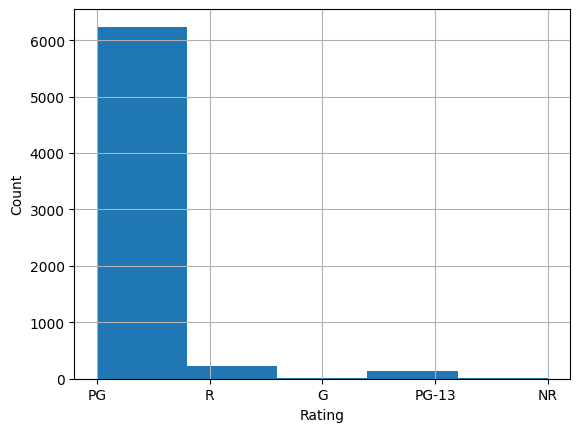

In [90]:
fig, ax = plt.subplots()
financials['certification'].hist(bins = 5)
ax.set_xlabel("Rating")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

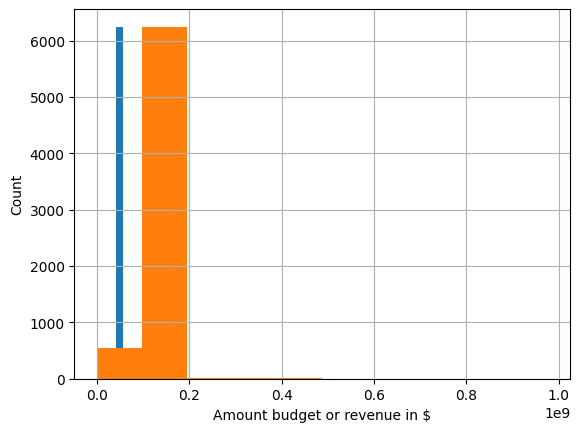

In [94]:
fig, ax = plt.subplots()
financials['budget'].hist()
financials['revenue'].hist()
ax.set_xlabel("Amount budget or revenue in $")
ax.set_ylabel("Count")

### Rated G

In [95]:
financials_G = financials['certification'] == 'G'


new_df1 = financials.loc[financials_G]

avg_rev = new_df1['revenue'].mean()

print(avg_rev)

avg_budget = new_df1['budget'].mean()

print(avg_budget)

123708547.42857143
40857142.85714286


### Rated PG

In [96]:
financials_PG = financials['certification'] == 'PG'


new_df2 = financials.loc[financials_PG]

avg_rev = new_df2['revenue'].mean()

print(avg_rev)

avg_budget = new_df2['budget'].mean()

print(avg_budget)

131889680.11814684
49971825.90718179


### Rated PG_13

In [98]:
financials_PG_13 = financials['certification'] == 'PG-13'


new_df3 = financials.loc[financials_PG_13]

avg_rev = new_df3['revenue'].mean()

print(avg_rev)

avg_budget = new_df3['budget'].mean()

print(avg_budget)

99700843.23076923
43483907.13076923


### Rated R

In [100]:
financials_R = financials['certification'] == 'R'


new_df4 = financials.loc[financials_R]

avg_rev = new_df4['revenue'].mean()

print(avg_rev)

avg_budget = new_df4['budget'].mean()

print(avg_budget)

33347149.90350877
19822387.93859649


### NR

In [101]:
financials_NR = financials['certification'] == 'NR'


new_df5 = financials.loc[financials_NR]

avg_rev = new_df5['revenue'].mean()

print(avg_rev)

avg_budget = new_df5['budget'].mean()

print(avg_budget)

8887618.88235294
6300005.529411765


Text(0, 0.5, 'Count')

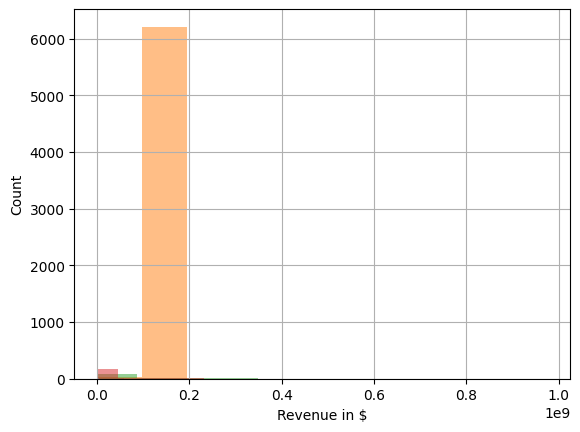

In [103]:
0.0
fig, ax = plt.subplots()
new_df1['revenue'].hist(alpha = 0.5)
new_df2['revenue'].hist(alpha = 0.5)
new_df3['revenue'].hist(alpha = 0.5)
new_df4['revenue'].hist(alpha = 0.5)
new_df5['revenue'].hist(alpha = 0.5)
ax.set_xlabel('Revenue in $')
ax.set_ylabel("Count")

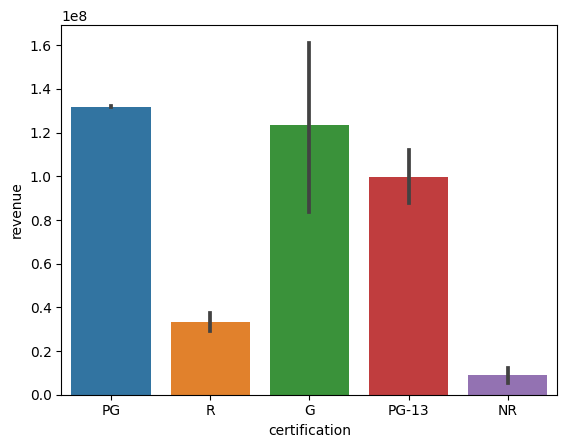

In [105]:
ax = sns.barplot(data=financials, x='certification', y='revenue', ci=68)

In [106]:
needed_cols=['certification', 'revenue']
financials[needed_cols]


,certification,revenue
1,PG,132000000.0
2,PG,132000000.0
3,PG,132000000.0
4,PG,132000000.0
5,PG,132000000.0
...,...,...
4285,NaN,123021750.0
4301,NaN,0.0
4303,NaN,500000.0
4315,NaN,0.0


In [108]:
groups = {}
for certification in financials['certification'].unique():
    temp=financials.loc[financials['certification']==certification, 'revenue']
    groups[certification]= temp
    
    
groups.keys()

dict_keys(['PG', nan, 'R', 'G', 'PG-13', 'NR'])

In [110]:
groups.items()

dict_items([('PG', 1       132000000.0
2       132000000.0
3       132000000.0
4       132000000.0
5       132000000.0
           ...     
3688     37317558.0
3837     24516772.0
3946     42776760.0
3965            0.0
3966     28023563.0
Name: revenue, Length: 6238, dtype: float64), (nan, Series([], Name: revenue, dtype: float64)), ('R', 3151         0.0
3156     14904.0
3161    105983.0
3170    327418.0
3175         0.0
          ...   
3944         0.0
3953    318451.0
3996         0.0
4186         0.0
4251         0.0
Name: revenue, Length: 228, dtype: float64), ('G', 3158    224834564.0
3165    169327687.0
3420     27965865.0
3528     19748009.0
3591    183611771.0
3614    103291131.0
3710     45554533.0
3837     68411275.0
3158    579707738.0
3184       100202.0
3457    165335153.0
3643     44460850.0
3677     80936232.0
3745     18634654.0
Name: revenue, dtype: float64), ('PG-13', 3162    546388105.0
3163    296339527.0
3190    127666415.0
3195    123307945.0
3199     34566746.0

## The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?



1A. (Null Hypothesis): a movies' Ratings doesn't affect the revenue it generates

1B. (Alternative Hypothesis): A movies' ratings can determine how much revenue a movie generates.

In [112]:
temp = np.abs(stats.zscore(groups['PG'])) > 3
temp.value_counts()

False    6207
True       31
Name: revenue, dtype: int64

In [114]:
#loop  through group dict
for certification,data in groups.items():
    #determine if there are any outliers
    outliers= np.abs(stats.zscore(data)) > 3
    ##Print a statement about how many outliers for which group name
    print(f'there were {outliers.sum()} outliers in the {certification} group')
    ##Remove the outliers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[certification] = data 

there were 31 outliers in the PG group
there were 0 outliers in the nan group
there were 5 outliers in the R group
there were 1 outliers in the G group
there were 2 outliers in the PG-13 group
there were 0 outliers in the NR group


In [127]:
stats.normaltest(groups['PG']).pvalue


0.0

In [126]:
stats.normaltest(groups['R']).pvalue<0.5


True

In [125]:
stats.normaltest(groups['PG-13']).pvalue<0.5


True

In [121]:
stats.normaltest(groups['G']).pvalue<0.5


/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


True

In [122]:
stats.normaltest(groups['NR']).pvalue<0.5


/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


True

Reject the null hypothesis. A movies' ratings  affects how much revenue a movie generates.

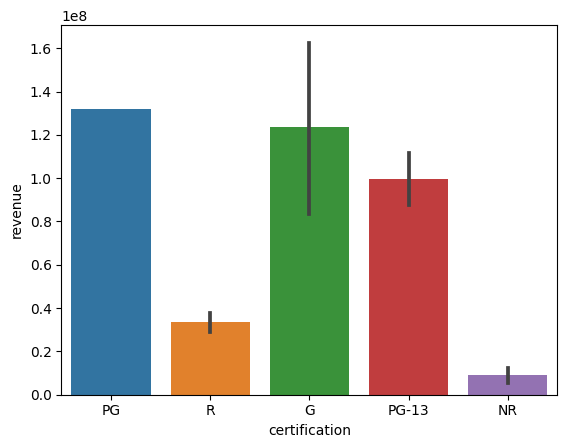

In [123]:
ax = sns.barplot(data=financials, x='certification', y='revenue', ci=68)

movies rated PG earned the most money in 2000 and 2001, thee P value is 0.0